In [194]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
data = pd.read_csv(r'C:\Users\Jayant\IMDb Movies India.csv' , encoding= 'unicode_escape')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
data.shape

(15509, 10)

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [198]:
pd.isnull(data)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [199]:
pd.isnull(data).sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [200]:
data.dropna(inplace=True)

In [201]:
pd.isnull(data).sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [202]:
# Extract year from the 'Year' column and convert it to numeric
data['Year'] = data['Year'].str.extract('(\d{4})').astype(float)

# Convert duration to numeric (in minutes)
data['Duration'] = data['Duration'].str.replace(' min', '').astype(float)

# Fill missing values in 'Year' and 'Duration' columns with the median values
data['Year'].fillna(data['Year'].median(), inplace=True)
data['Duration'].fillna(data['Duration'].median(), inplace=True)


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Jayant\AppData\Local\Temp\ipykernel_20956\2643473504.py:2: SyntaxWarning: invalid escape sequence '\d'
  data['Year'] = data['Year'].str.extract('(\d{4})').astype(float)
C:\Users\Jayant\AppData\Local\Temp\ipykernel_20956\2643473504.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Year'].fillna(data['Year'].median(), inplace=True)
C:\Users\Jayant\AppData\Local\Temp\ipykernel_20956\2643473504.py:9: FutureWarning:

In [203]:
pd.isnull(data).sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

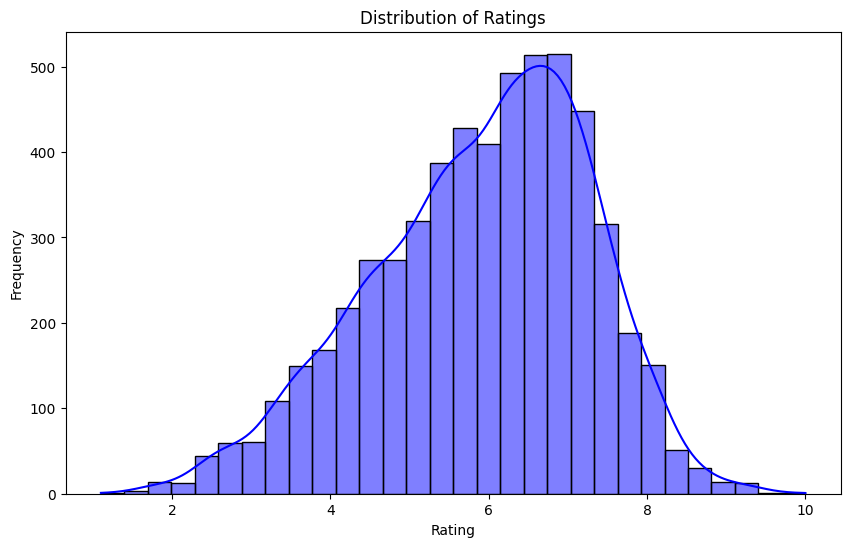

In [235]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], kde=True, bins=30, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [204]:
# Fill missing categorical values with a placeholder
data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']] = data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']].fillna('Unknown')

In [205]:
# One-hot encode categorical columns (Genre, Director, Actor 1, Actor 2, Actor 3)
data = pd.get_dummies(data, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)

In [206]:
# Define features (X) and target (y)
X = data.drop(columns=['Name', 'Rating', 'Votes'])
Y = data['Rating']


In [207]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [208]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [209]:
# Make predictions on the training set
y_pred = model.predict(X_train)

In [210]:
# Evaluate the model for training
mse = mean_squared_error(Y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_train, y_pred)

In [211]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.016679363874280536
Root Mean Squared Error: 0.12914861158479612
R^2 Score: 0.9912257366186427


In [212]:
from sklearn.metrics import  mean_absolute_error

In [213]:
mae = mean_absolute_error(Y_train, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.04233022291173774


In [214]:
print(y_pred)

[6.20093672 5.59997081 7.29914477 ... 4.69996325 4.39998002 3.89977293]


In [215]:
# Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)

[-5.79355681e+07 -6.89666626e+07 -1.07976414e+08 ...  2.65406940e+00
 -2.76666094e+07  5.64778786e+07]


In [216]:
# Evaluate the model for test
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

In [217]:
mae = mean_absolute_error(Y_test, y_pred)

In [218]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 1.3390561288561542e+17
Root Mean Squared Error: 365931158.6700638
R^2 Score: -6.928988244949017e+16
Mean Absolute Error: 78240106.47625102


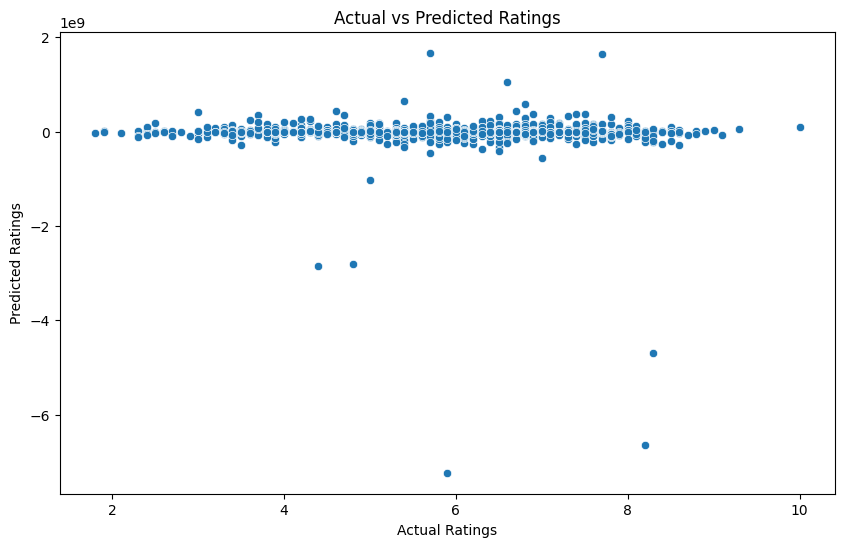

In [231]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()

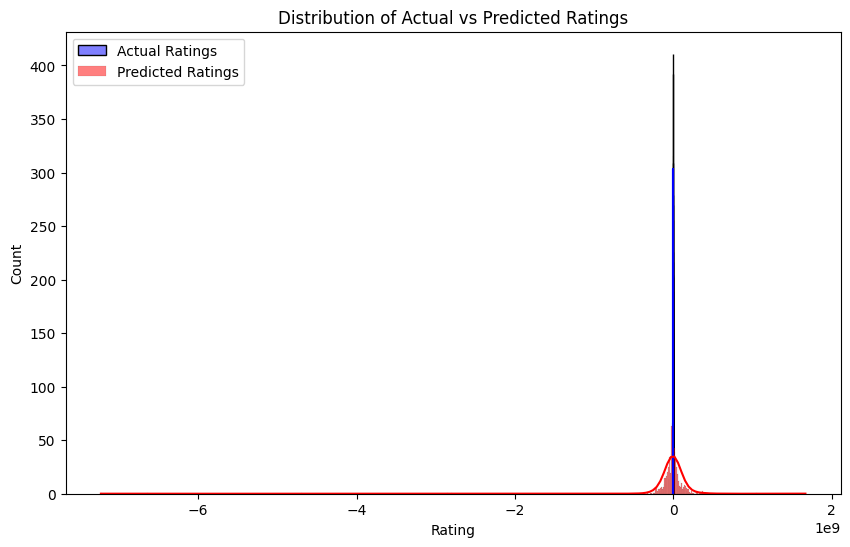

In [232]:
# Distribution of Actual vs Predicted Ratings
plt.figure(figsize=(10, 6))
sns.histplot(Y_train, color='blue', kde=True, label='Actual Ratings')
sns.histplot(y_pred, color='red', kde=True, label='Predicted Ratings')
plt.legend()
plt.title('Distribution of Actual vs Predicted Ratings')
plt.show()

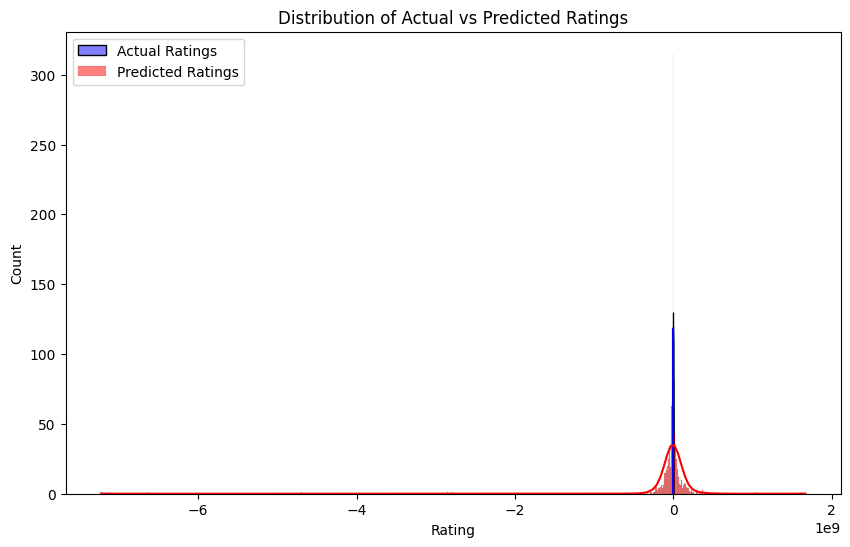

In [233]:
# Distribution of Actual vs Predicted Ratings
plt.figure(figsize=(10, 6))
sns.histplot(Y_test, color='blue', kde=True, label='Actual Ratings')
sns.histplot(y_pred, color='red', kde=True, label='Predicted Ratings')
plt.legend()
plt.title('Distribution of Actual vs Predicted Ratings')
plt.show()

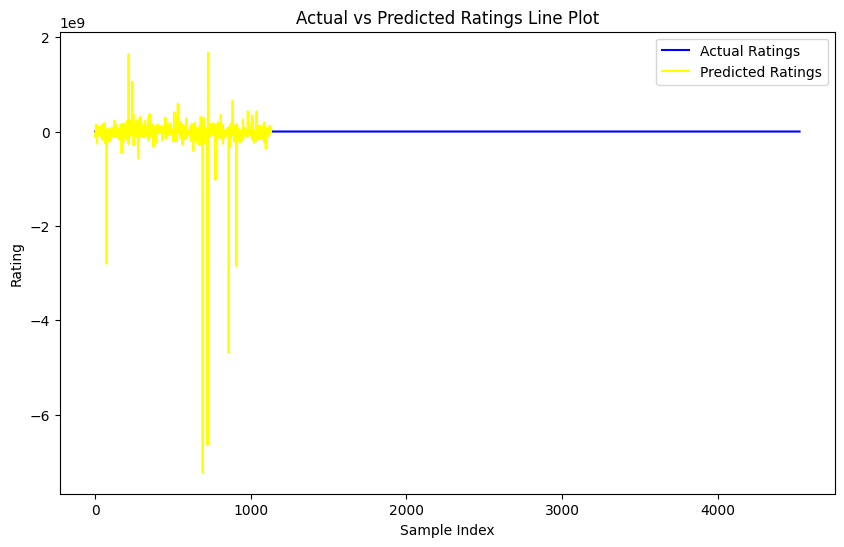

In [226]:
# Actual vs Predicted Ratings Line Plot
plt.figure(figsize=(10, 6))
plt.plot(Y_train.values, label='Actual Ratings', color='blue')
plt.plot(y_pred, label='Predicted Ratings', color='yellow')
plt.legend()
plt.title('Actual vs Predicted Ratings Line Plot')
plt.xlabel('Sample Index')
plt.ylabel('Rating')
plt.show()